# DBSCAN: Smiley Data Set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

(225, 2)


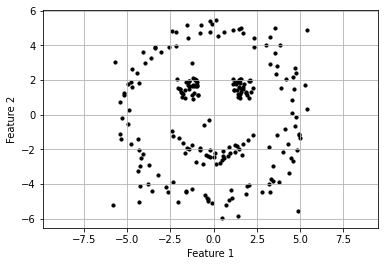

In [2]:
# References: 
# https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.htm
# https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
# https://www.youtube.com/watch?v=_A9Tq6mGtLI

np.random.seed(1)

# Generate a smiley data
N = 100
t = np.linspace(0, 2*np.pi, N)
X = 5*np.vstack((np.sin(t), np.cos(t))).T + np.random.rand(N, 2) - 0.5
for _ in range(35):
    xp = np.random.rand()*5 - 2.5
    yp = 0.25*xp ** 2 - 2.5 + np.random.rand() - 0.5
    p1 = 1.2*np.random.rand(1, 2) + np.array([-1.6, 1.4]) - 0.5
    p2 = 1.2*np.random.rand(1, 2) + np.array([1.6, 1.4]) - 0.5
    p3 = np.array([xp, yp])
    X = np.vstack((X, p1, p2, p3))

X = np.vstack((X, np.random.rand(20, 2)*12 - 6))
print(X.shape)

plt.scatter(X[:,0], X[:,1], c='k', s=10)
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

## Create DBSCAN class

In [3]:
class my_dbscan:
    def __init__(self, eps=0.5, minPts=5):
        self.minPts = minPts
        self.eps = eps
        
    def get_neighs(self, i):
        return np.where(self.dist[i,:] <= self.eps)[0]     # self is included
    
    def fit(self, X):
        self.labels = np.zeros(len(X), dtype=int)          # >=0 (cluster label), -1 (outlier)
        self.vis = np.zeros(len(X), dtype=bool)            # True if visited
        
        self.dist = pairwise_distances(X, metric='euclidean')
        clust = 0
        
        for i in range(len(X)):
            if not self.vis[i]:                            # if not yet visited
                self.vis[i] = True                         #    set i to visited
                self.labels[i] = clust                     #    set the cluster_label of i
                neighs = self.get_neighs(i)                #    get the neighbors of i
                
                if len(neighs) >= self.minPts:             #    if it is not an outlier
                    # DFS (depth-first search)
                    st = list(neighs)                      #       initialize the stack
                    while len(st) > 0:                     #       while stack is not empty
                        j = st.pop()                       #          pop the stack
                        if not self.vis[j]:                #          if not yet visited
                            self.vis[j] = True             #             set j to visited
                            self.labels[j] = clust         #             set the cluster_label
                            neighs = self.get_neighs(j)    #             get neighbors of j
                            if len(neighs) >= self.minPts: #             if it is a core pt
                                st.extend(neighs)          #                push neighs to stack
                        elif self.labels[j] == -1:         #          even if j was an outlier before
                            self.labels[j] = clust         #             include j in the cluster
                                                           #             but don't push j into stack
                    clust += 1                             #       add 1 to cluster label
                
                else:
                    self.labels[i] = -1                    #    visited pt becomes outlier
        
        return self.labels
                    

## Perform DBSCAN

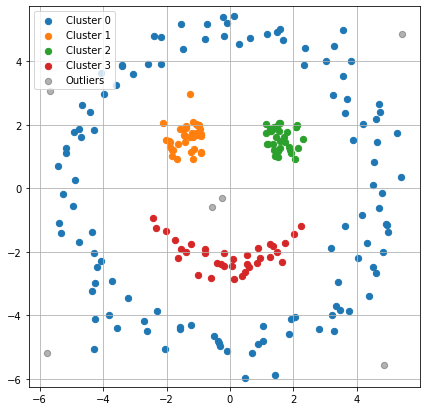

In [4]:
dbscan = my_dbscan(eps=1, minPts=4)
labels = dbscan.fit(X)

#print(np.hstack((X, labels.reshape(-1,1))))

plt.figure(figsize=(7, 7))

for i in range(np.max(labels)+1):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=40, label=f'Cluster {i}')

plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='k', s=40, alpha=0.3, label='Outliers')
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

## Visualize the neighborhoods defined by eps

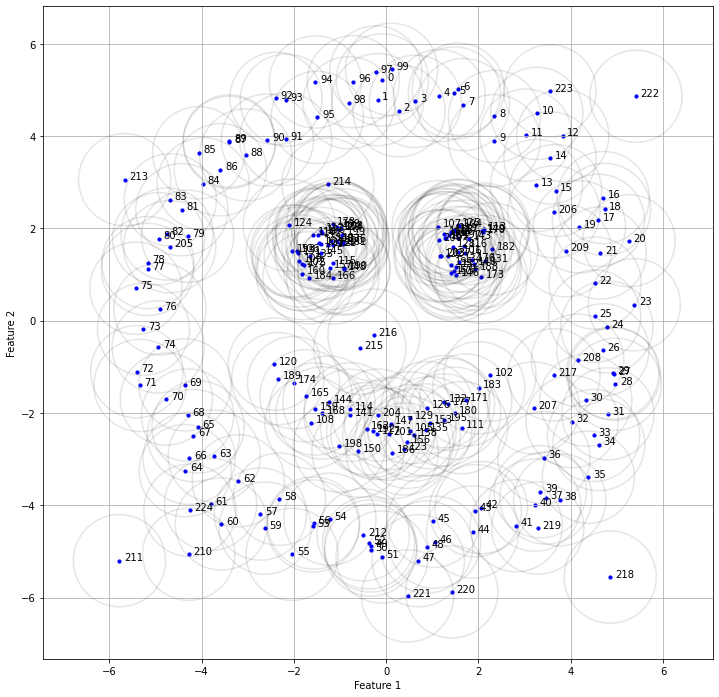

In [5]:
th = np.linspace(0,2*np.pi)
plt.figure(figsize=(12,12))
plt.scatter(X[:,0], X[:,1], c='b', s=10)
for i in range(len(X)):
    plt.text(X[i,0]+0.1, X[i,1], s=f'{i}')
    plt.plot(X[i,0] + np.cos(th), X[i,1] + np.sin(th), c='k', alpha=0.1)
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

## Compare with sklearn DBSCAN

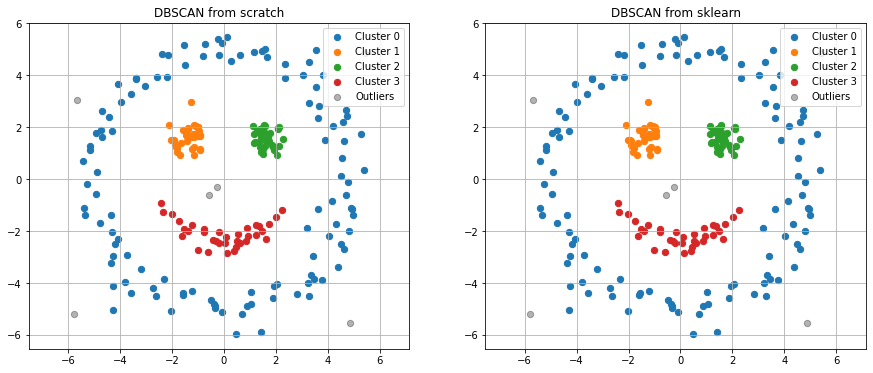

In [6]:
from sklearn.cluster import DBSCAN

clust_mdl = DBSCAN(eps=1, min_samples=4).fit(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for i in range(np.max(labels)+1):
    ax1.scatter(X[labels == i, 0], X[labels == i, 1], s=40, label=f'Cluster {i}')
    ax2.scatter(X[clust_mdl.labels_ == i, 0], X[clust_mdl.labels_ == i, 1], 
               s=40, label=f'Cluster {i}')

ax1.scatter(X[labels == -1, 0], X[labels == -1, 1], c='k', s=40, alpha=0.3, label='Outliers')
ax2.scatter(X[clust_mdl.labels_ == -1, 0], X[clust_mdl.labels_ == -1, 1], c='k', 
            s=40, alpha=0.3, label='Outliers')
ax1.set_title('DBSCAN from scratch')
ax2.set_title('DBSCAN from sklearn')
ax1.axis('equal')
ax2.axis('equal')
ax1.legend()
ax2.legend()
ax1.grid()
ax2.grid()
plt.show()